In [42]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

plt.style.use("bmh")
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'
# %config InlineBackend.figure_formats=["png"]

# Preprocessing

In [61]:
def process_data():
    data = pd.read_csv("data/half_dataset.csv", index_col='timestamp_second', dtype=np.float16, skiprows=[1])
    return data

data = process_data()

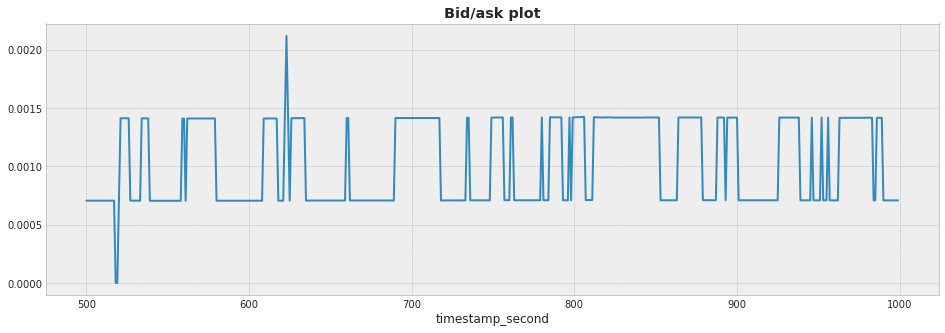

In [66]:
fig = plt.figure(figsize=(16, 5))

data['spread'] = (data['ask_price_0.1'] - data['bid_price_0.1']) / data['bid_price_0.1']
data['spread'].iloc[500:1000].plot()

plt.title("Bid/ask plot", weight="bold")


plt.show()

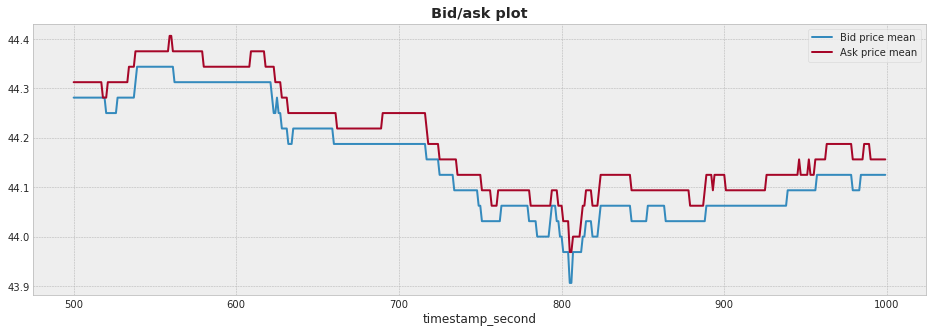

In [68]:
fg = plt.figure(figsize=(16,5))

data['bid_price_0.1'].iloc[500:1000].plot()
data['ask_price_0.1'].iloc[500:1000].plot()

plt.title("Bid/ask plot", weight="bold")

plt.legend(['Bid price mean',
            'Ask price mean']
           )

plt.show()

На мой взгляд, стоит предсказывать именно изменение цены, так как ряд, состоящий из изменений цены, обычно имеет постоянное среднее (0), и постоянную дисперсию в рамках небольших периодов. Ряд из цен обычно напоминает случайное блуждание, поэтому дисперсия и среднее не постоянны. Следовательно, ряд, состоящий из изменений, "более стационарен", поэтому методы машинного обучения на нем могут работать лучше.